In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [6]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

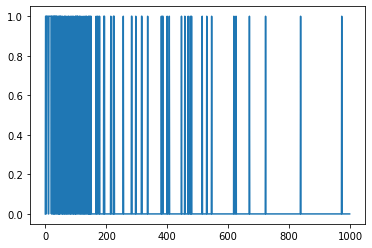

In [3]:
plt.plot(train_data[0])

In [7]:
train_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

## 과대적합 예제

- "너무 많은 용량"과 "충분하지 않은 용량" 사이의 균형이 필요
- 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다. 여러 가지 다른 구조를 사용해 실험을 해봐야 한다.


### 기준 모델 만들기

In [8]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                16016     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5580 - accuracy: 0.7224 - binary_crossentropy: 0.5580 - val_loss: 0.4271 - val_accuracy: 0.8175 - val_binary_crossentropy: 0.4271 - 574ms/epoch - 12ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3711 - accuracy: 0.8442 - binary_crossentropy: 0.3711 - val_loss: 0.3448 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3448 - 164ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3235 - accuracy: 0.8655 - binary_crossentropy: 0.3235 - val_loss: 0.3304 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3304 - 159ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3117 - accuracy: 0.8706 - binary_crossentropy: 0.3117 - val_loss: 0.3280 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3280 - 166ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3043 - accuracy: 0.8752 - binary_crossentropy: 0.3043 - val_loss: 0.3277 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3277 - 161ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3005 - accuracy: 0.8754 - binary

### 작은 모델 만들기
- 앞서 만든 기준 모델과 비교하기 위해 적은 수의 은닉 유닛을 가진 모델을 만들어 보죠

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 4004      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6517 - accuracy: 0.6550 - binary_crossentropy: 0.6517 - val_loss: 0.5811 - val_accuracy: 0.7617 - val_binary_crossentropy: 0.5811 - 571ms/epoch - 12ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4959 - accuracy: 0.8042 - binary_crossentropy: 0.4959 - val_loss: 0.4332 - val_accuracy: 0.8258 - val_binary_crossentropy: 0.4332 - 165ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3846 - accuracy: 0.8448 - binary_crossentropy: 0.3846 - val_loss: 0.3648 - val_accuracy: 0.8499 - val_binary_crossentropy: 0.3648 - 167ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3381 - accuracy: 0.8622 - binary_crossentropy: 0.3381 - val_loss: 0.3430 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3430 - 173ms/epoch - 4ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3191 - accuracy: 0.8692 - binary_crossentropy: 0.3191 - val_loss: 0.3359 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3359 - 170ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3099 - accuracy: 0.8735 - binary

### 큰 모델 만들기

아주 큰 모델을 만들어 얼마나 빠르게 과대적합이 시작되는지 알아 볼 수 있습니다. 이 문제에 필요한 것보다 훨씬 더 큰 용량을 가진 네트워크를 추가해서 비교해 보죠:

In [12]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               512512    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
#accuracy 가 1이 나오는건 정상이 아니다.

bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4353 - accuracy: 0.7908 - binary_crossentropy: 0.4353 - val_loss: 0.3360 - val_accuracy: 0.8551 - val_binary_crossentropy: 0.3360 - 969ms/epoch - 20ms/step
Epoch 2/20
49/49 - 1s - loss: 0.2892 - accuracy: 0.8792 - binary_crossentropy: 0.2892 - val_loss: 0.3261 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3261 - 579ms/epoch - 12ms/step
Epoch 3/20
49/49 - 1s - loss: 0.2287 - accuracy: 0.9078 - binary_crossentropy: 0.2287 - val_loss: 0.3361 - val_accuracy: 0.8577 - val_binary_crossentropy: 0.3361 - 533ms/epoch - 11ms/step
Epoch 4/20
49/49 - 1s - loss: 0.1199 - accuracy: 0.9613 - binary_crossentropy: 0.1199 - val_loss: 0.4248 - val_accuracy: 0.8458 - val_binary_crossentropy: 0.4248 - 536ms/epoch - 11ms/step
Epoch 5/20
49/49 - 1s - loss: 0.0288 - accuracy: 0.9949 - binary_crossentropy: 0.0288 - val_loss: 0.5021 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.5021 - 546ms/epoch - 11ms/step
Epoch 6/20
49/49 - 1s - loss: 0.0059 - accuracy: 0.9997 - bi

## 훈련 손실과 검증 손실 그래프 그리기

실선은 훈련 손실이고 점선은 검증 손실입니다(낮은 검증 손실이 더 좋은 모델입니다). 여기서는 작은 네트워크가 기준 모델보다 더 늦게 과대적합이 시작되었습니다(즉 에포크 4가 아니라 6에서 시작됩니다). 또한 과대적합이 시작되고 훨씬 천천히 성능이 감소합니다.

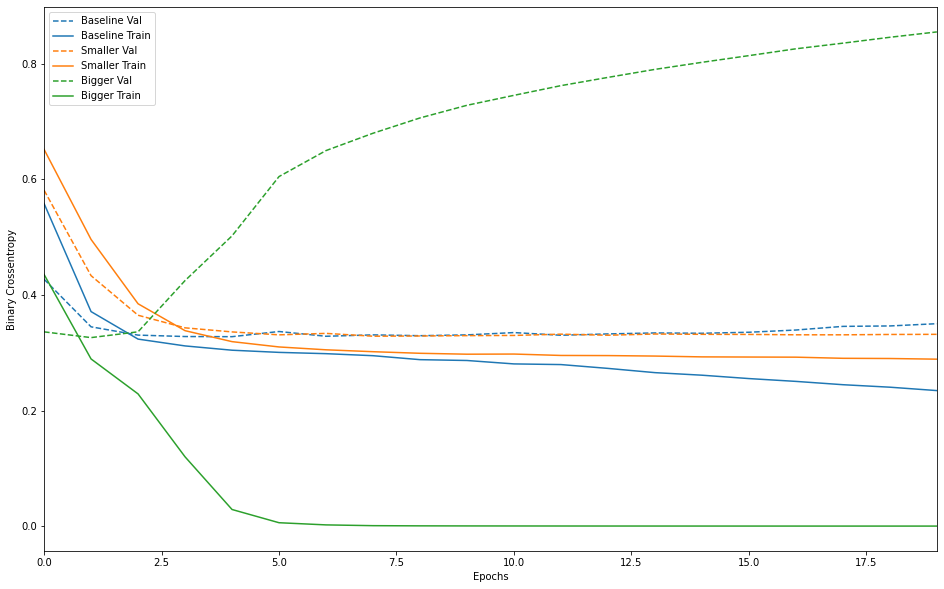

In [14]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

큰 네트워크는 거의 바로 첫 번째 에포크 이후에 과대적합이 시작되고 훨씬 더 심각하게 과대적합됩니다. 네트워크의 용량이 많을수록 훈련 세트를 더 빠르게 모델링할 수 있습니다(훈련 손실이 낮아집니다). 하지만 더 쉽게 과대적합됩니다(훈련 손실과 검증 손실 사이에 큰 차이가 발생합니다).

## 과대적합을 방지하기 위한 전략

가중치를 규제하기

L2 규제를 사용해서 과대적합 방지하기

In [15]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6442 - accuracy: 0.6771 - binary_crossentropy: 0.6004 - val_loss: 0.4852 - val_accuracy: 0.8116 - val_binary_crossentropy: 0.4426 - 576ms/epoch - 12ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4113 - accuracy: 0.8463 - binary_crossentropy: 0.3682 - val_loss: 0.3856 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3427 - 165ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3620 - accuracy: 0.8674 - binary_crossentropy: 0.3197 - val_loss: 0.3761 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3346 - 152ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3495 - accuracy: 0.8719 - binary_crossentropy: 0.3088 - val_loss: 0.3692 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3293 - 153ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3418 - accuracy: 0.8757 - binary_crossentropy: 0.3026 - val_loss: 0.3691 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3307 - 147ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3377 - accuracy: 0.8754 - binary

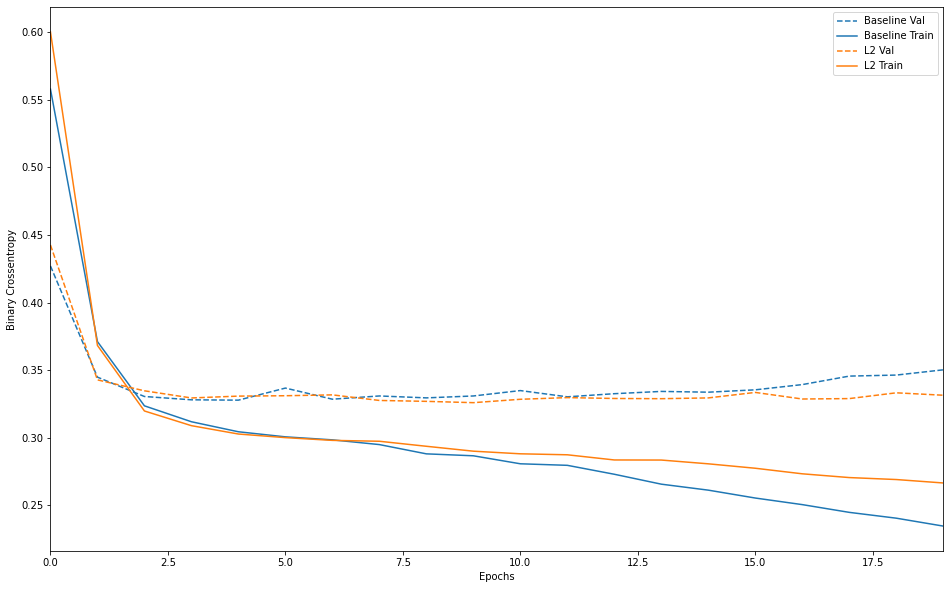

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

드롭 아웃 추가하기

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6856 - accuracy: 0.5528 - binary_crossentropy: 0.6856 - val_loss: 0.6276 - val_accuracy: 0.7202 - val_binary_crossentropy: 0.6276 - 621ms/epoch - 13ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5903 - accuracy: 0.6830 - binary_crossentropy: 0.5903 - val_loss: 0.4717 - val_accuracy: 0.8196 - val_binary_crossentropy: 0.4717 - 166ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4933 - accuracy: 0.7712 - binary_crossentropy: 0.4933 - val_loss: 0.3847 - val_accuracy: 0.8438 - val_binary_crossentropy: 0.3847 - 164ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4341 - accuracy: 0.8104 - binary_crossentropy: 0.4341 - val_loss: 0.3524 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3524 - 166ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4072 - accuracy: 0.8274 - binary_crossentropy: 0.4072 - val_loss: 0.3394 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3394 - 166ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3850 - accuracy: 0.8377 - binary

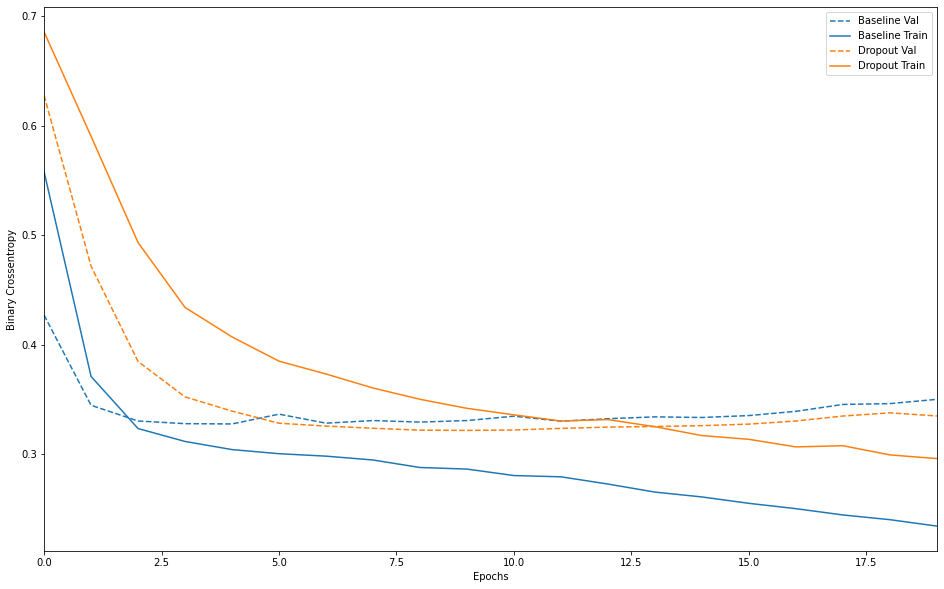

In [18]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])